# Introduction
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.<br>
<br>
It contains only numerical input variables which are the result of a PCA transformation.
<br>
Due to confidentiality issues, there are not provided the original features and more background information about the data.
<br>
Features V1, V2, ... V28 are the principal components obtained with PCA;<br>
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.<br>
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

C:\Users\rohit\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Read the data

In [2]:
data_df = pd.read_csv(r"creditcard.csv")

# Check Data

In [3]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data_df.shape

(284807, 31)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# 0 for Not fraud & 1 is for Fraud
data_df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Highly unbalance data 

In [7]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).

# Check missing data
Let's check if there is any missing data.

In [9]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()


,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

# Data unbalance
Let's check data unbalance with respect with target value, i.e. Class.

In [10]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x=df["Class"],y=df['values'],name="Credit Card Feaud Class - data unbalance (Not Fraud =0, Fraud =1)",
    marker=dict(color="Red"),text=df['values'])

data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')


Only **492 (or 0.172%)** of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable **Class**.

# Data exploration
Transactions in time

In [11]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ["Not Fraud", "Fraud"]

fig = ff.create_distplot(hist_data, group_labels,show_hist=False, show_rug=False)
fig['layout'].update(title="Credit Card Transaction Time Density Plot", xaxis=dict(title='Time[s]'))
iplot(fig,filename='dist_only')


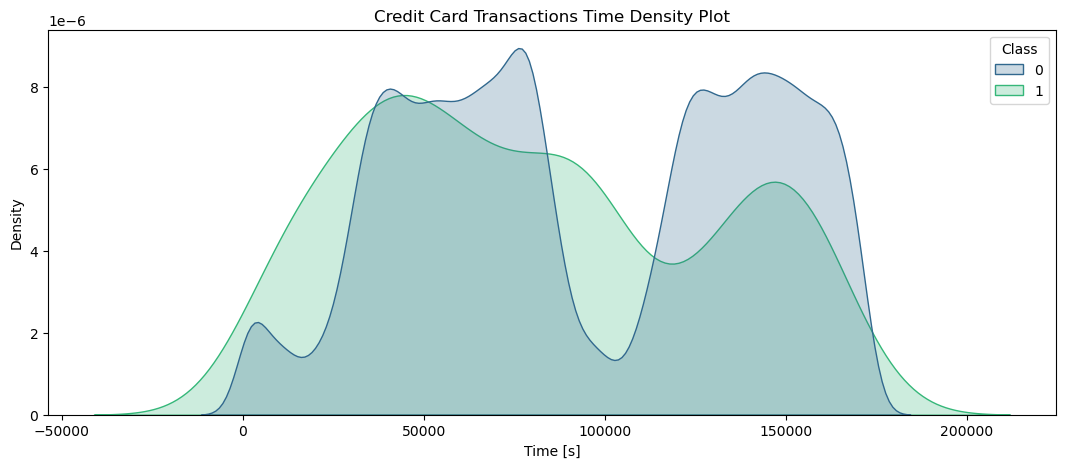

In [12]:
# Assuming data_df is your DataFrame
plt.figure(figsize=(13,5)) #width=16 #height=5
sns.kdeplot(data=data_df, x='Time', hue='Class', fill=True, common_norm=False, palette='viridis')

plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.show()

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.
<br>
___
Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

In [13]:
data_df["Hour"] = data_df['Time'].apply(lambda x:np.floor(x/3600))
tmp = data_df.groupby(['Hour','Class'])['Amount'].aggregate(['min','max','count','sum','mean','median','var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


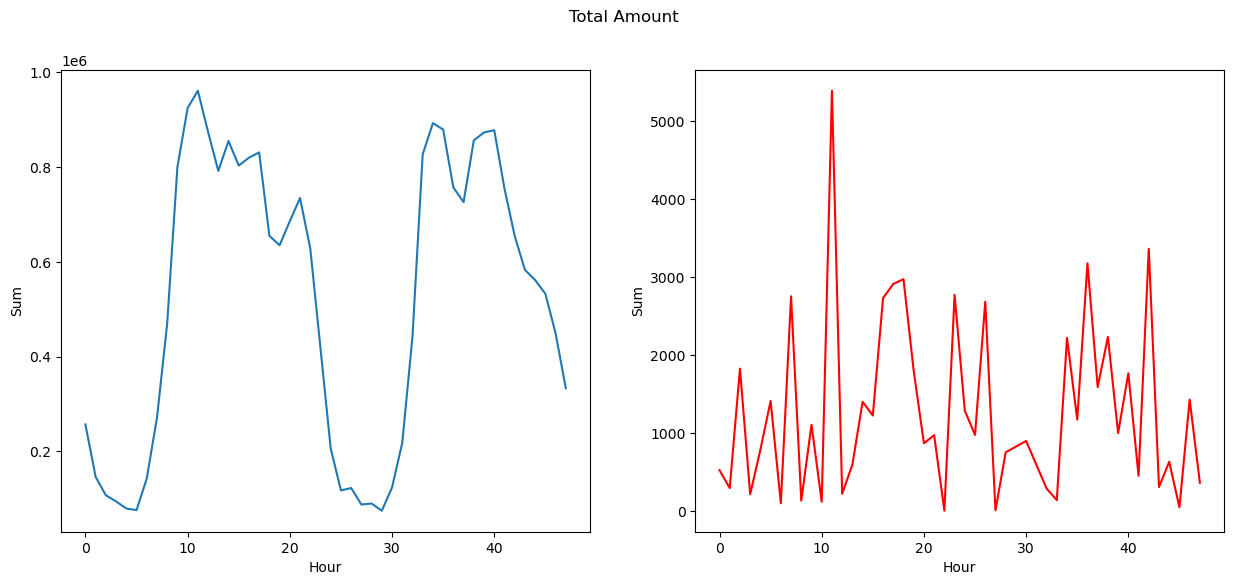

In [14]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

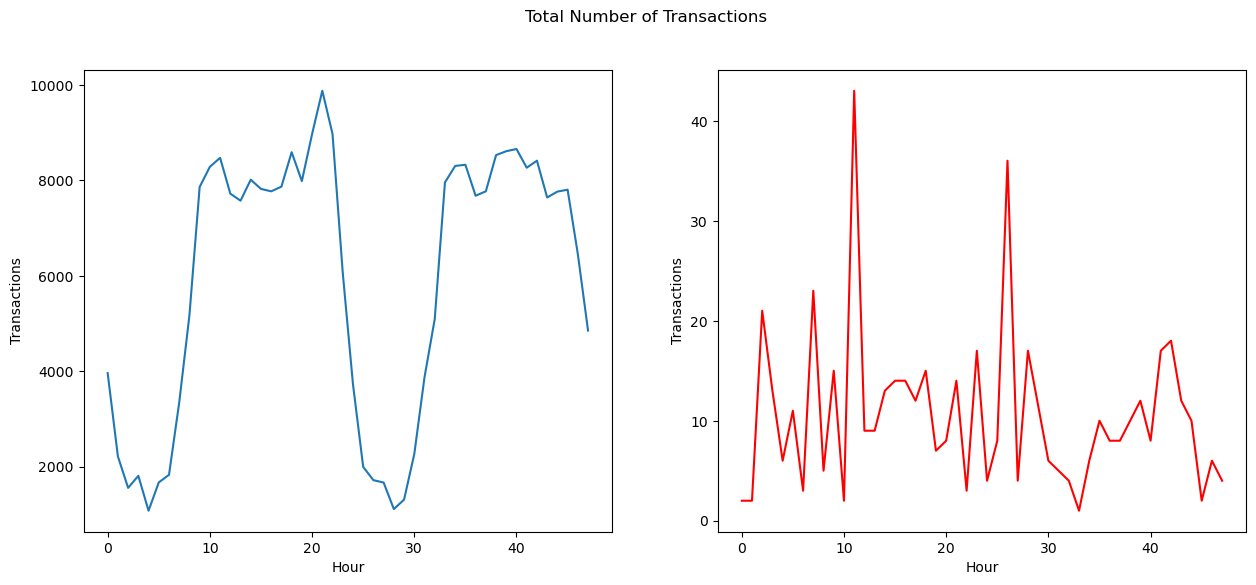

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

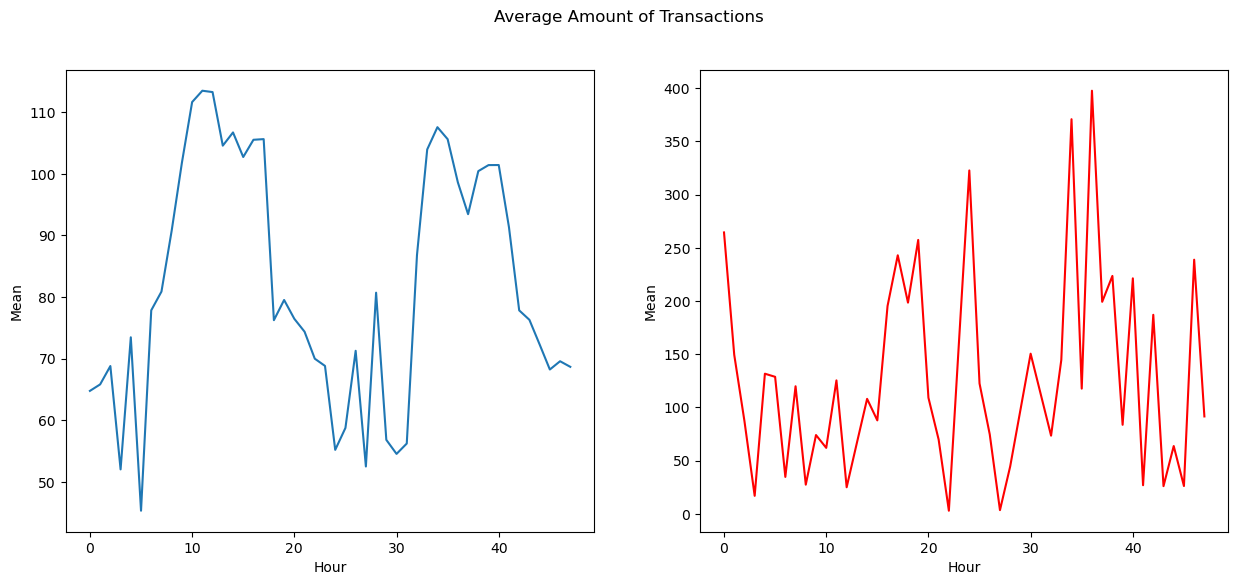

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

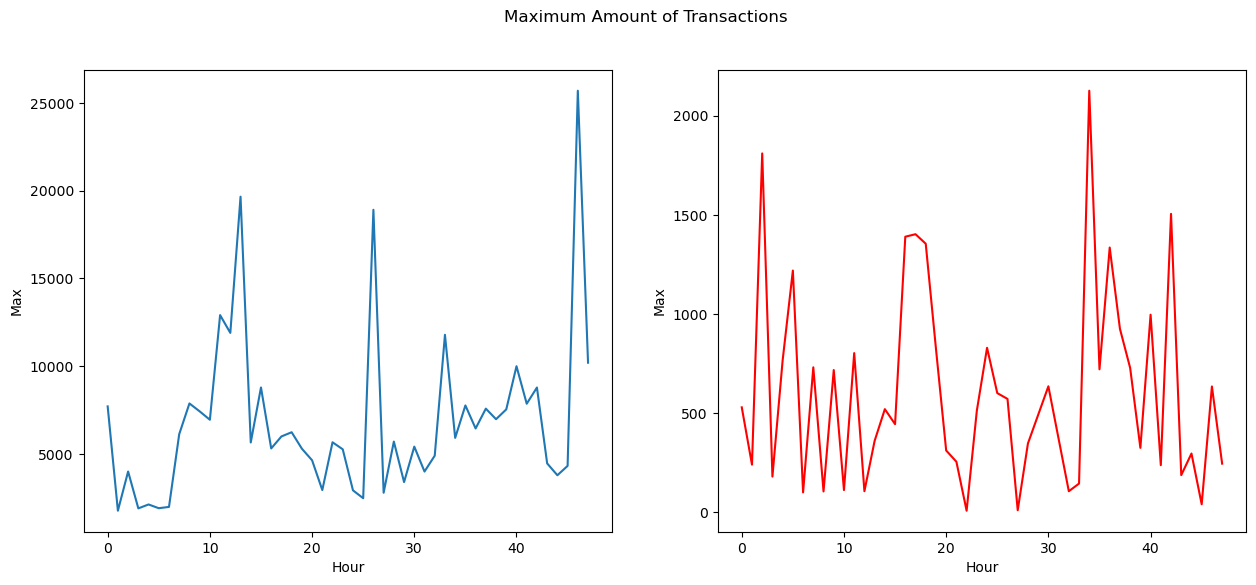

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

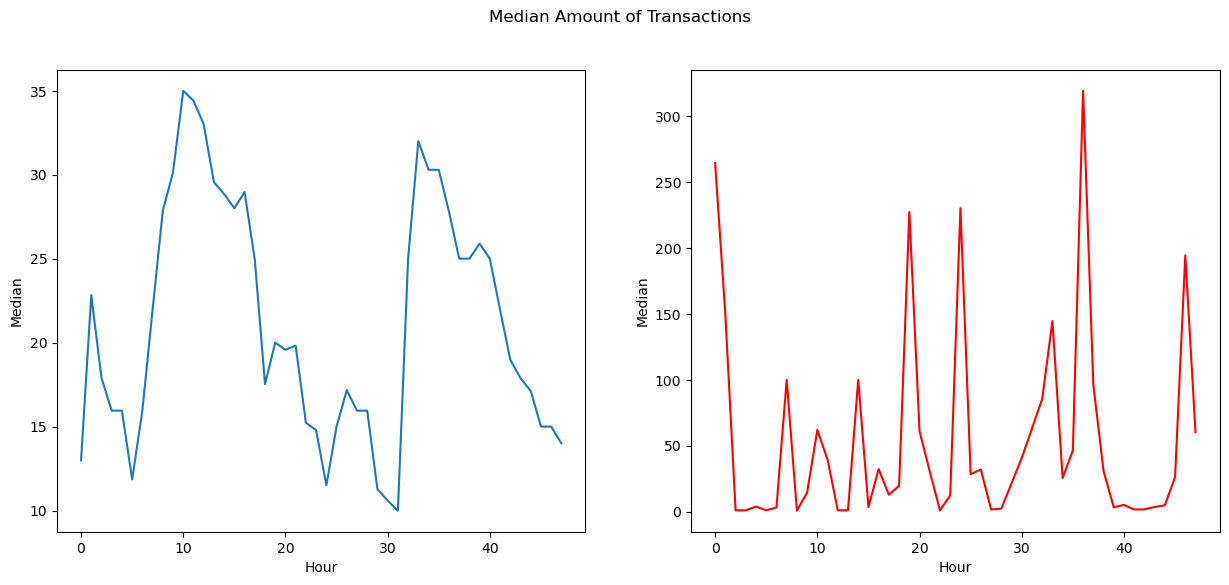

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();


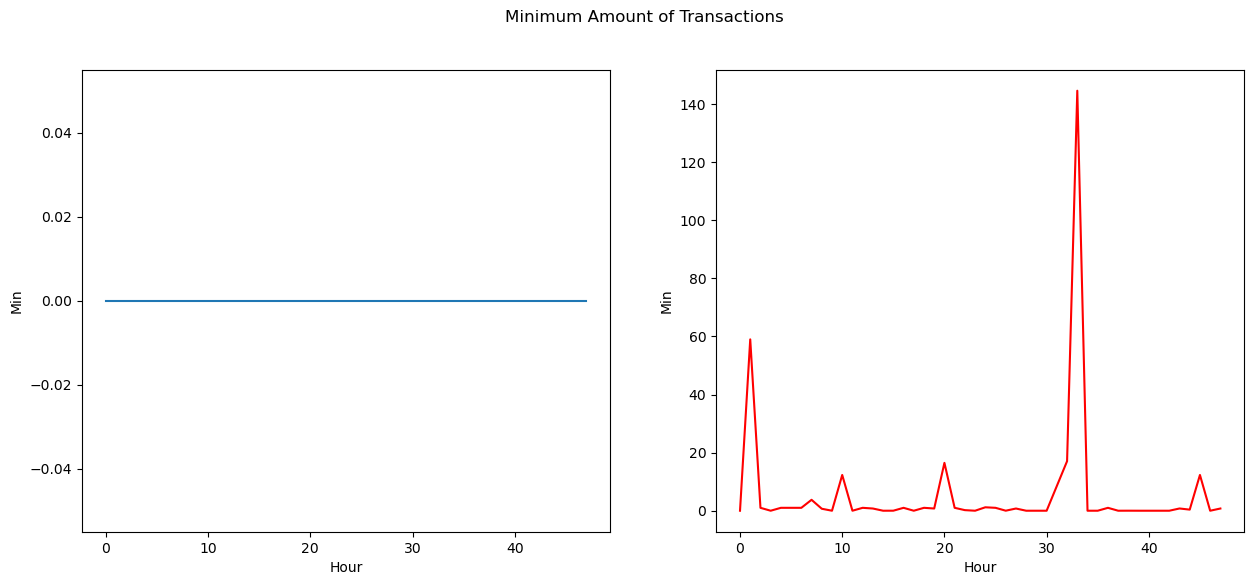

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();


# Transactions amount

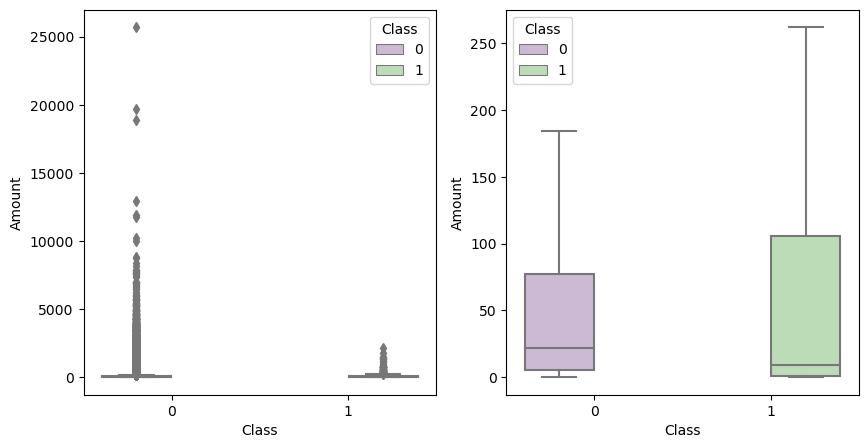

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [21]:
data_df[['Amount','Class']]

,Amount,Class
0,149.62,0
1,2.69,0
2,378.66,0
3,123.50,0
4,69.99,0
...,...,...
284802,0.77,0
284803,24.79,0
284804,67.88,0
284805,10.00,0


In [22]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
temp.head()

0    284315
1       492
Name: Class, dtype: int64

In [24]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

In [25]:
# fraud = data_df.loc[data_df['Class'] == 1]
# trace = go.Scatter(
#     x = fraud['Time'],y = fraud['Amount'],
#     name="Amount",
#      marker=dict(
#                 color='rgb(238,23,11)',
#                 line=dict(
#                     color='red',
#                     width=1),
#                 opacity=0.5,
#             ),
#     text= fraud['Amount'],
#     mode = "markers"
# )
# data = [trace]
# layout = dict(title = 'Amount of fraudulent transactions',
#           xaxis = dict(title = 'Time [s]', showticklabels=True), 
#           yaxis = dict(title = 'Amount'),
#           hovermode='closest'
#          )
# fig = dict(data=data, layout=layout)
# iplot(fig, filename='fraud-amount')

In [26]:
import plotly.express as px
fraud = data_df.loc[data_df['Class'] == 1]

fig = px.scatter(fraud,x='Time',y='Amount', color_discrete_sequence=['rgb(238,23,11)'],
    opacity=0.5,
    labels={'Time': 'Time [s]', 'Amount': 'Amount'},
    title='Amount of Fraudulent Transactions'
)
fig.update_traces(marker=dict(line=dict(color='red', width=1)))
fig.show()


# Features correlation

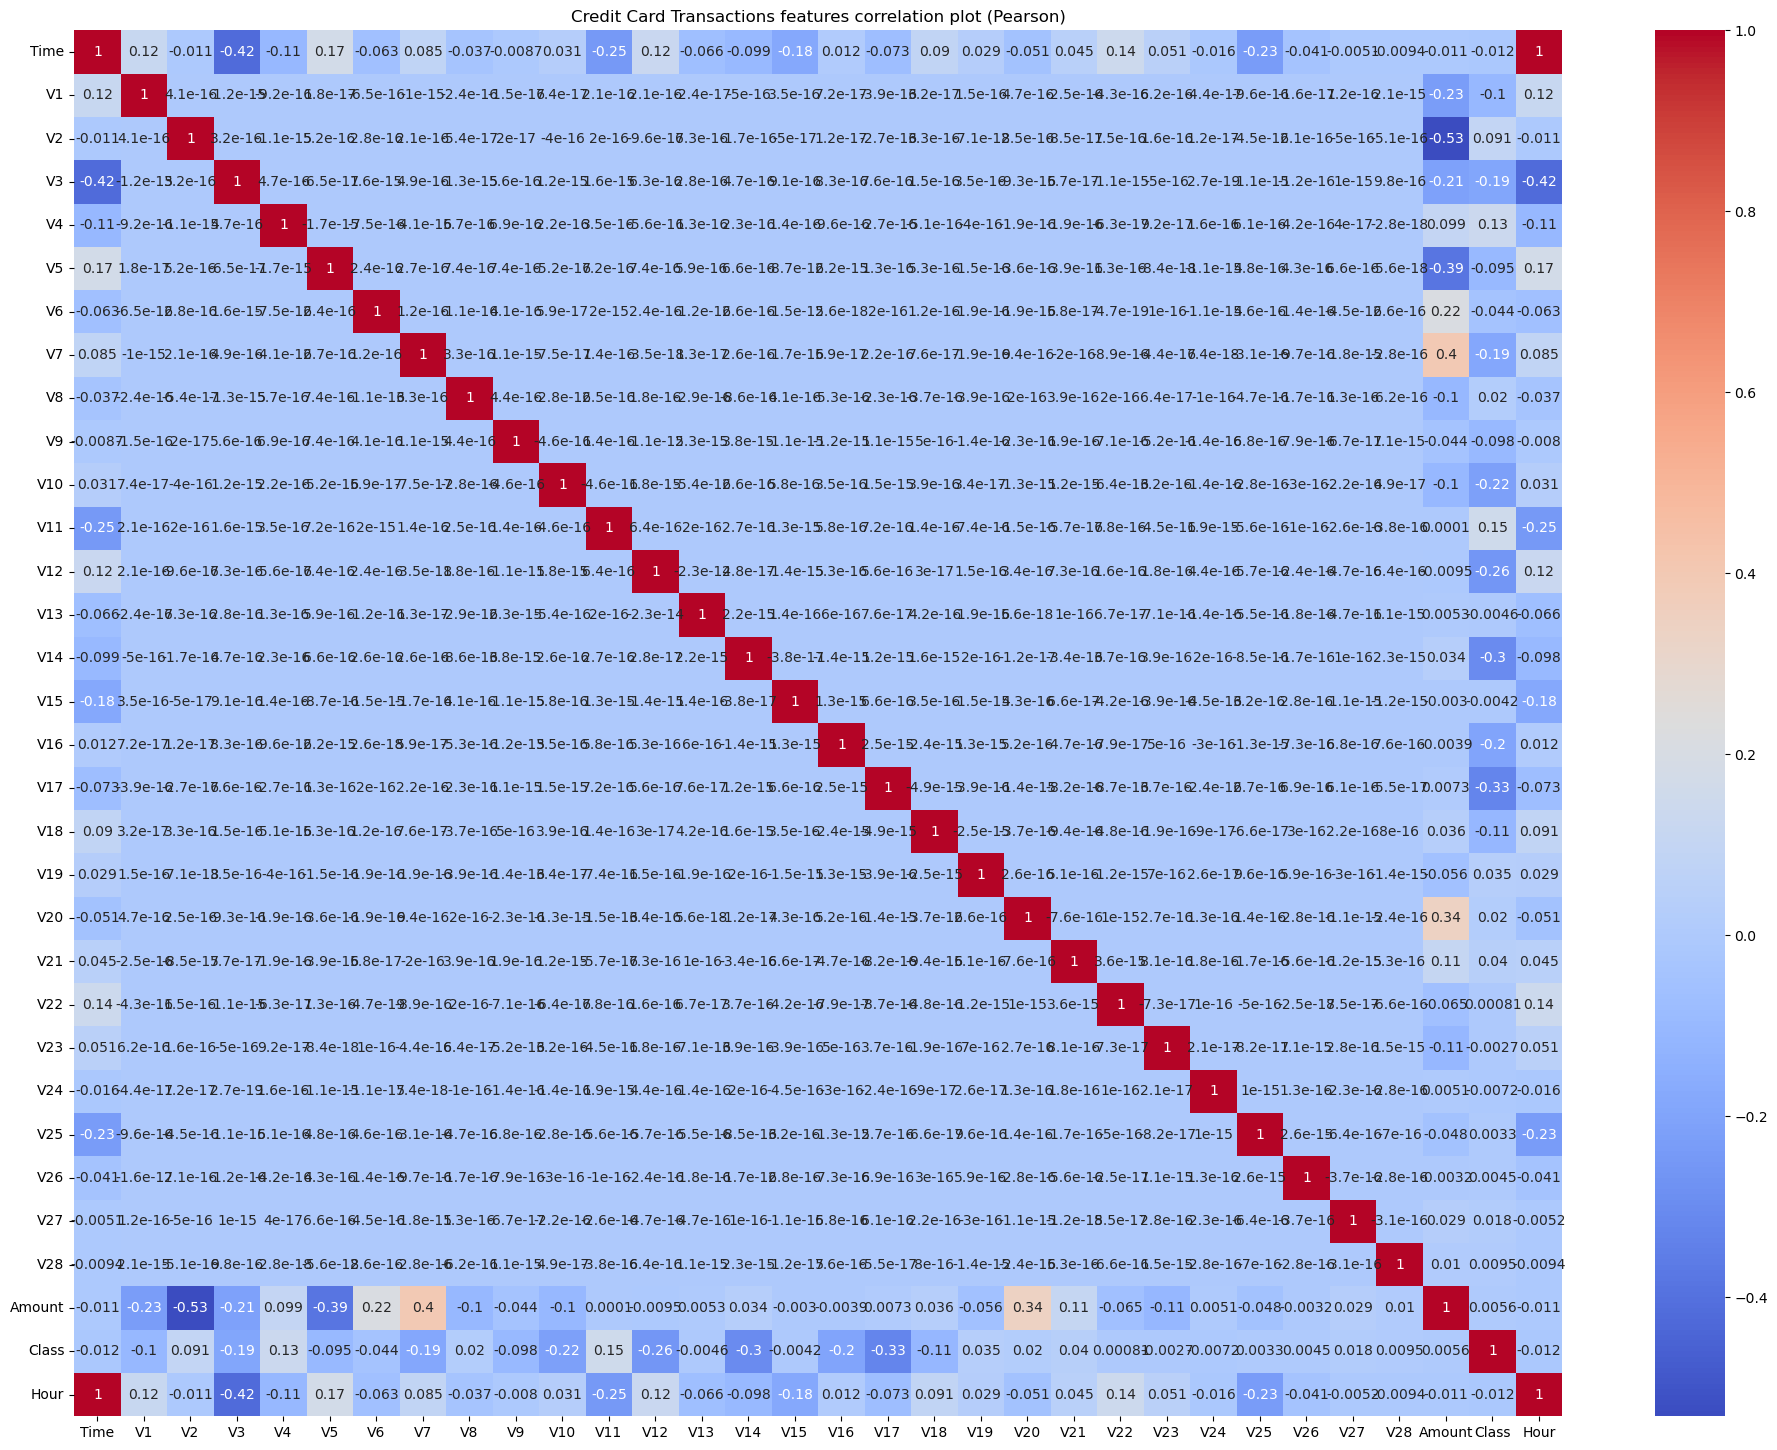

In [27]:
plt.figure(figsize=(24,18))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,cmap='coolwarm', annot=True)
plt.show()

In [28]:
# plt.figure(figsize = (14,14))
# plt.title('Credit Card Transactions features correlation plot (Pearson)')
# corr = data_df.corr()
# sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
# plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

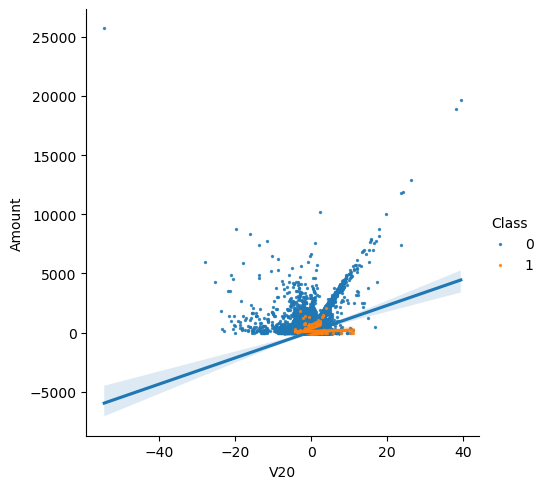

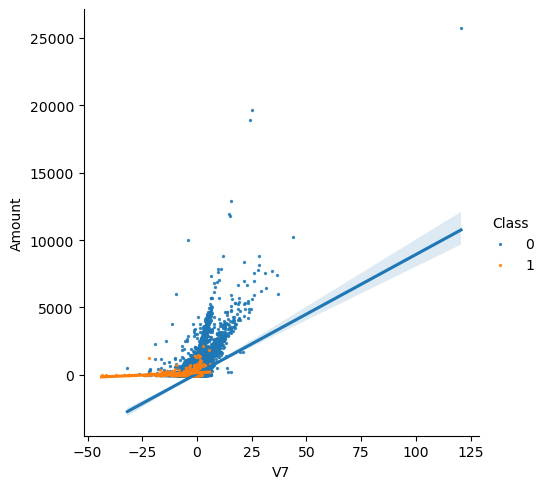

In [29]:
s = sns.lmplot(x='V20', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

Let's plot now the inverse correlated values.

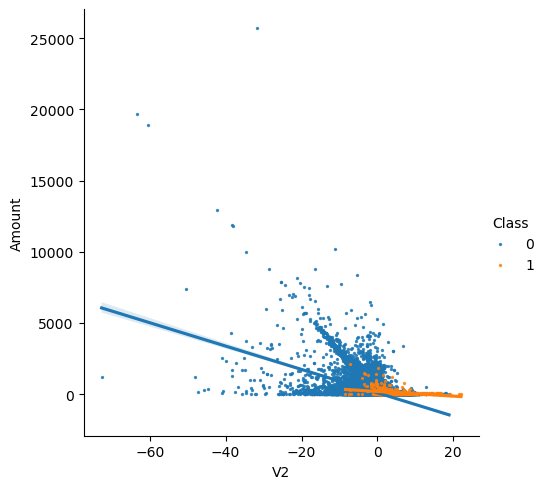

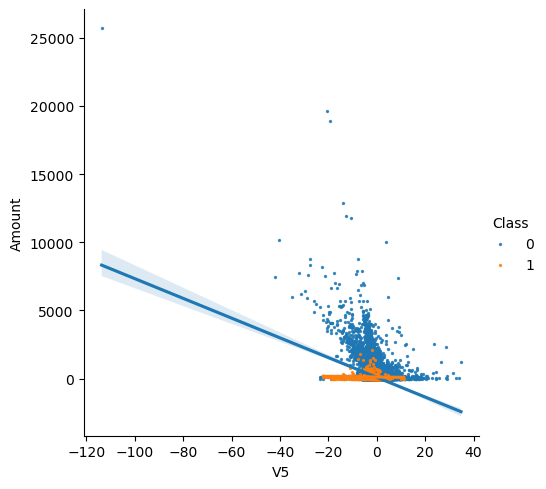

In [30]:
s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are inverse correlated (the regression lines for **Class = 0** have a negative slope while the regression lines for **Class = 1** have a very small negative slope).

# Features density plot


In [31]:
data_df.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class', 'Hour'], dtype=object)

C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:15: UserWarning:



The `bw` parameter is de

C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:14: UserWarning:



The `bw` parameter is de

C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\rohit\AppData\Local\Temp\ipykernel_3872\955923673.py:14: UserWarning:



The `bw` parameter is de

<Figure size 640x480 with 0 Axes>

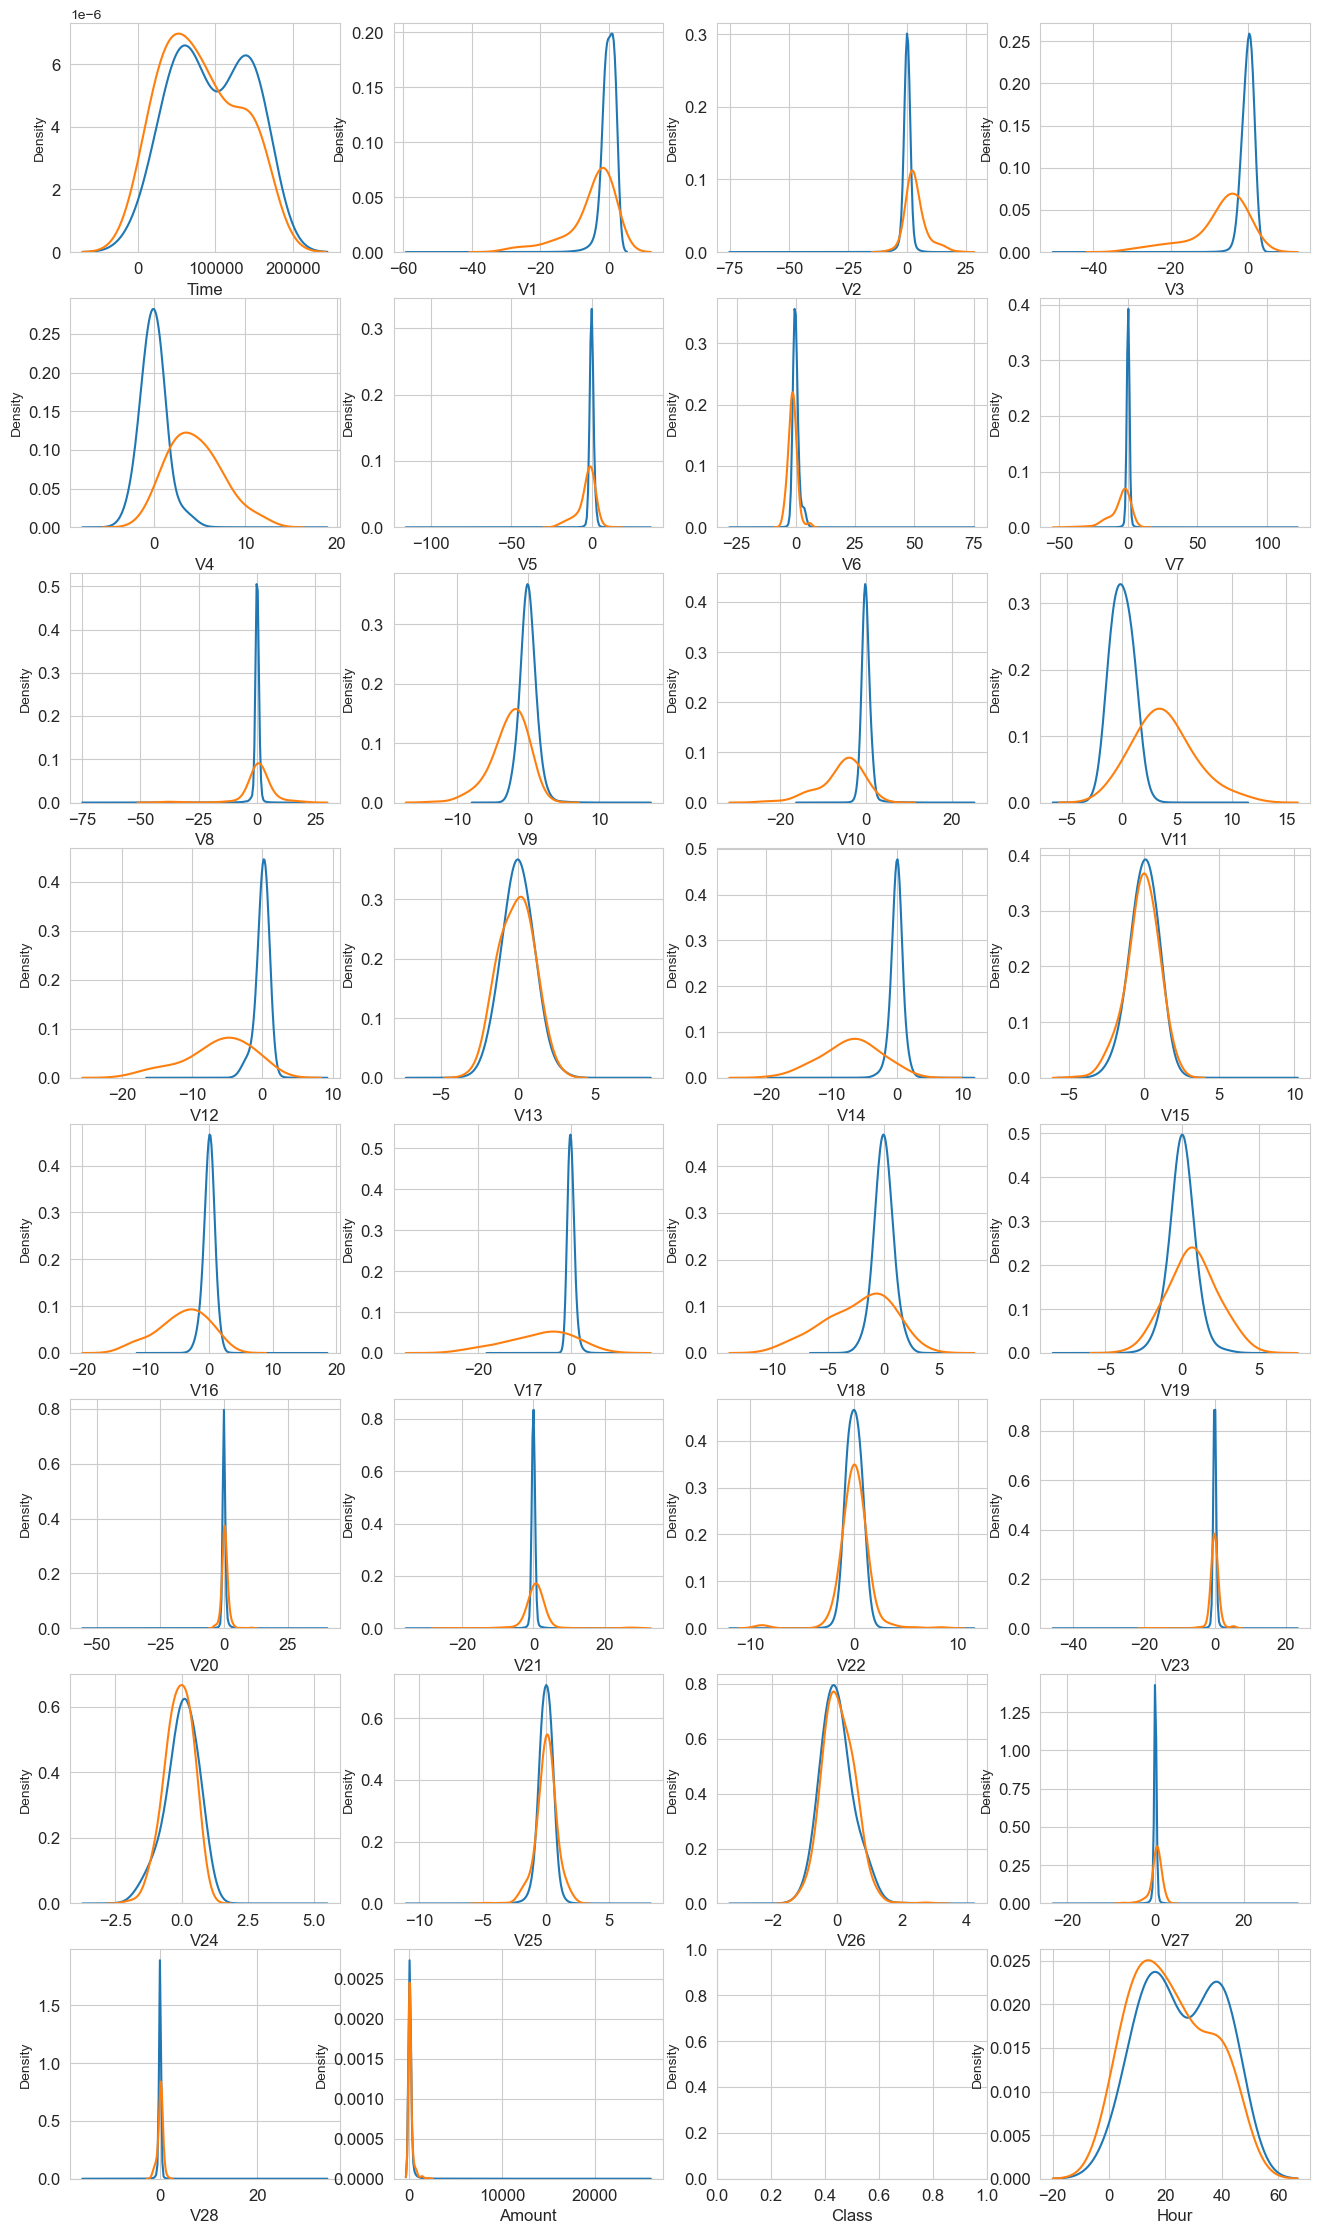

In [32]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of **Class: V4, V11** have clearly separated distributions for **Class values 0 and 1, V12, V14, V18** are partially separated, **V1, V2, V3, V10** have a quite distinct profile, whilst **V25, V26, V28** have similar profiles for the two values of Class.

In general, with just few exceptions **(Time and Amount)**, the features distribution for legitimate transactions (values of **Class = 0**) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of **Class = 1**) have a skewed (asymmetric) distribution.

# Predictive models
### Define predictors and target values
Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [33]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16',
              'V17', 'V18', 'V19','V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

### Split data in train, test and validation set
Let's define train, validation and test sets.

In [34]:
# VALIDATION
#VALID_SIZE = 0.20 # simple validation using train_test_split
#TEST_SIZE = 0.20 # test size using_train_test_split

In [35]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data_df, test_size=0.20, random_state=42, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.20, random_state=42, shuffle=True )


Let's start with a RandomForrestClassifier model.
# RandomForestClassifier
Define model parameters
Let's set the parameters for the model.

Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use as validation criterion **GINI**, which formula is **GINI = 2 * (AUC) - 1**, where **AUC** is the **Receiver Operating Characteristic - Area Under Curve (ROC-AUC).** Number of estimators is set to 100 and number of parallel jobs is set to **4.**

We start by initializing the RandomForestClassifier.

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=42,
                             criterion='gini',#metric used for RandomForrestClassifier RFC_METRIC
                             n_estimators=100,
                             verbose=False)

Let's train the **RandonForestClassifier** using the **train_df** data and **fit function.**

`train_df[target]` is a pandas Series, which can be passed directly to the fit method. However, using `.values` explicitly converts the **pandas Series to a NumPy array**, which might sometimes be necessary for compatibility with certain machine learning models or libraries.

In [38]:
#train_df[predictors]= X_train
#train_df[target]= y_train
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

Let's now predict the **target** values for the **valid_df** data, using **predict** function.

In [39]:
# valid_df[predictors] = valid_X_train
y_preds = clf.predict(valid_df[predictors])

Let's also visualize the features importance.

### Features importance
Let's see the features importance.

In [40]:
clf.feature_importances_

array([0.01213179, 0.01295579, 0.01331119, 0.02002934, 0.02913439,
       0.01104382, 0.01367094, 0.02451757, 0.01432887, 0.03344779,
       0.08578521, 0.04933509, 0.13962256, 0.01015214, 0.12652072,
       0.01289569, 0.07993275, 0.14597871, 0.03078434, 0.01254521,
       0.0131044 , 0.0177296 , 0.01216913, 0.00777118, 0.0089164 ,
       0.00878624, 0.01955913, 0.01144932, 0.01087733, 0.01151335])

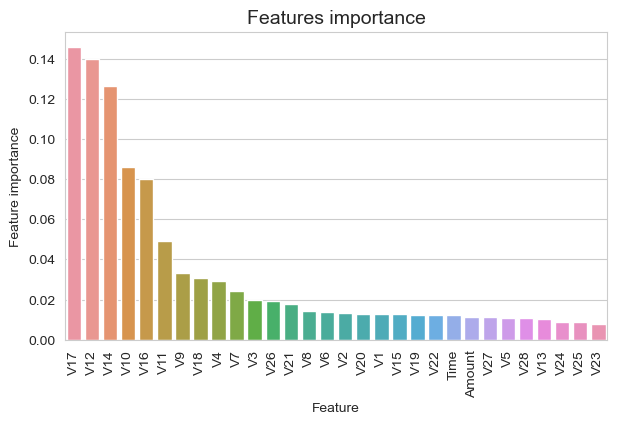

In [41]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

    The most important features are V17, V12, V14, V10, V11, V16.

### Confusion matrix
Let's visualize the confusion matrix.

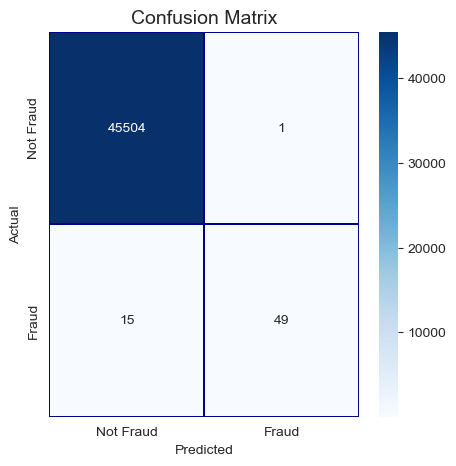

In [42]:
# Compute the confusion matrix using crosstab
cm = pd.crosstab(valid_df[target].values, y_preds, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap="Blues", 
            linewidths=0.2, 
            linecolor="darkblue", 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix', fontsize=14)
plt.show()


### Type I error and Type II error
We need to clarify that confussion matrix is not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need a different metrics that accounts in the same time for the selectivity and specificity of the method we are using, so that we minimize in the same time both Type I errors and Type II errors.

    Null Hypothesis (H0) - The transaction is not a fraud.
    Alternative Hypothesis (H1) - The transaction is a fraud.

    Type I error - You reject the null hypothesis when the null hypothesis is actually true.
    Type II error - You fail to reject the null hypothesis when the the alternative hypothesis is true.

**Cost of Type I error** - You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.
**Cost of Type II error** - You erroneously presume that the transaction is not a fraud and a fraudulent transaction is accepted.

The following image explains what **Type I error** and **Type II error** are:
![image.png](attachment:image.png)

Let's calculate the ROC-AUC score

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
#roc_auc_score(actual - predicted)
roc_clf= roc_auc_score(valid_df[target].values, y_preds)
print("The ROC-AUC score obtained with RandomForrestClassifier is",roc_clf)

The ROC-AUC score obtained with RandomForrestClassifier is 0.8828015121964619


The ROC-AUC score obtained with RandomForrestClassifier is **0.88**

# AdaBoostClassifier
AdaBoostClassifier stands for Adaptive Boosting Classifier
<br>**Prepare the model**
Let's set the parameters for the model and initialize the model.

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
ada= AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)

In [47]:
#train_df[predictors]= X_train
#train_df[target]= y_train
ada.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

The use of .values in `train_df[target].values` is to convert the target column (which is a pandas Series) into a NumPy array. This conversion is often done for compatibility with various machine learning libraries, such as scikit-learn, which expect input data in a specific format (like NumPy arrays).

### Predict the target values
Let's now predict the **target** values for the **valid_df** data, using predict function.

In [48]:
# valid_df[predictors] = valid_X_train
preds = ada.predict(valid_df[predictors])

### Features importance
Let's see also the features importance.

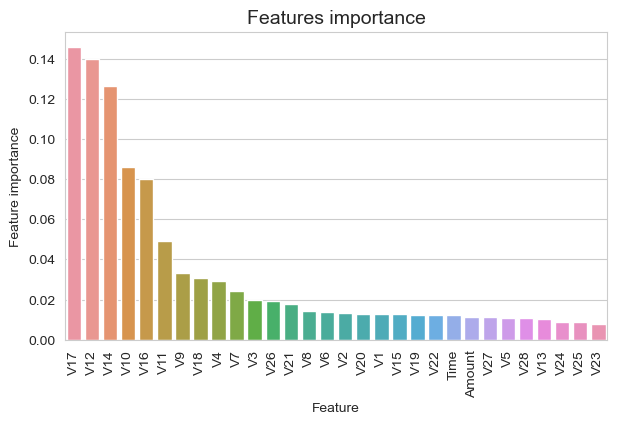

In [49]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

### Confusion matrix
Let's visualize the confusion matrix.

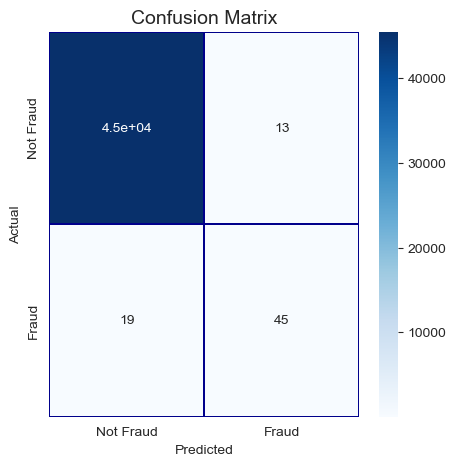

In [50]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC.

**Area under curve**

In [51]:
ada_roc_auc= roc_auc_score(valid_df[target].values, preds)
print("The ROC-AUC score obtained with AdaBoostClassifier is",ada_roc_auc)

The ROC-AUC score obtained with AdaBoostClassifier is 0.851419658554005


The ROC-AUC score obtained with AdaBoostClassifier is **0.85.**

# CatBoostClassifier
CatBoostClassifier is a gradient boosting for decision trees algorithm with support for handling categorical data [6].

**Prepare the model**<br>
Let's set the parameters for the model and initialize the model.

In [52]:
#!pip install catboost -q

In [53]:
from catboost import CatBoostClassifier

In [54]:
cat = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

In [55]:
cat.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 846ms	remaining: 7m 2s
50:	total: 28.5s	remaining: 4m 11s
100:	total: 56.2s	remaining: 3m 42s
150:	total: 1m 23s	remaining: 3m 13s
200:	total: 1m 57s	remaining: 2m 54s
250:	total: 2m 25s	remaining: 2m 24s
300:	total: 2m 55s	remaining: 1m 56s
350:	total: 3m 24s	remaining: 1m 27s
400:	total: 3m 54s	remaining: 57.8s
450:	total: 4m 24s	remaining: 28.7s
499:	total: 4m 52s	remaining: 0us


### Predict the target values
Let's now predict the **target values** for the **val_df data**, using predict function

In [56]:
preds = cat.predict(valid_df[predictors])

### Features importance
Let's see also the features importance.

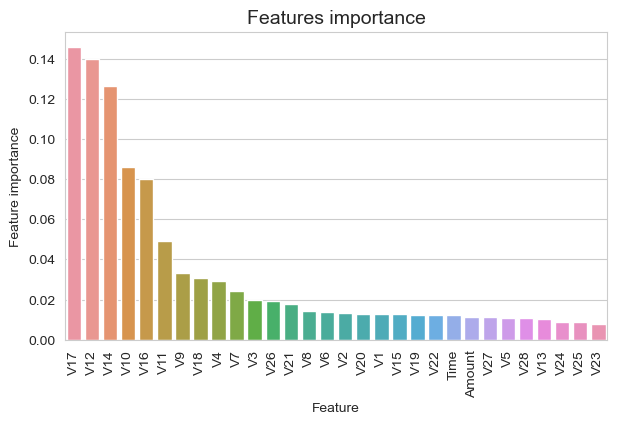

In [57]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### Confusion matrix
Let's visualize the confusion matrix.

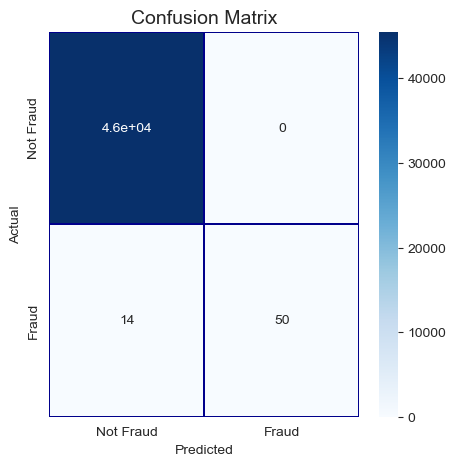

In [58]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC.

**Aread under curve**

In [59]:
cat_roc_auc = roc_auc_score(valid_df[target].values, preds)
print("The ROC-AUC score obtained with CatBoostClassifier is",cat_roc_auc)

The ROC-AUC score obtained with CatBoostClassifier is 0.890625


The ROC-AUC score obtained with CatBoostClassifier is **0.89**

# XGBoost
XGBoost is a gradient boosting algorithm.
Let's prepare the model.

**Prepare the model**
We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.

In [60]:
import xgboost as xgb

In [61]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 42

### Train the model
Let's train the model.

In [62]:
model = xgb.train(params, 
                dtrain, 
                1000, #max lgb iterations
                watchlist, 
                early_stopping_rounds=50, #lgb early stop 
                maximize=True, 
                verbose_eval=50)#Print out metric result

C:\Users\rohit\anaconda3\Lib\site-packages\xgboost\core.py:727: FutureWarning:

Pass `evals` as keyword args.

C:\Users\rohit\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning:

[02:24:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.




[0]	train-auc:0.89779	valid-auc:0.91331
[50]	train-auc:0.92295	valid-auc:0.92854
[100]	train-auc:0.96839	valid-auc:0.95899
[150]	train-auc:0.98615	valid-auc:0.97768
[187]	train-auc:0.98962	valid-auc:0.97790


The best validation score (ROC-AUC) was **0.977**, for round **241**.

#### Plot variable importance

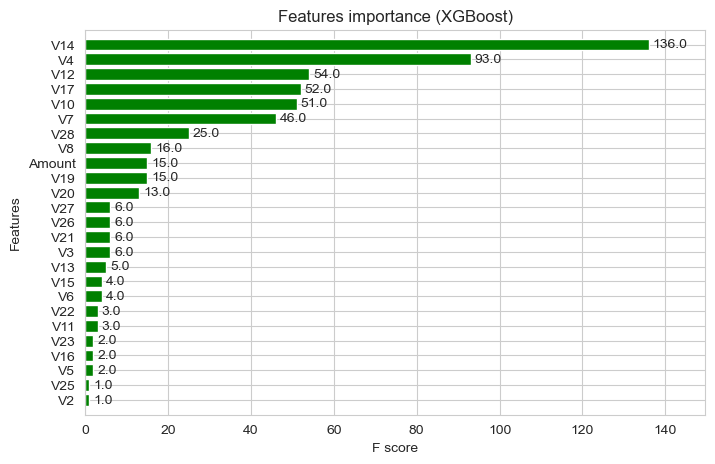

In [63]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

#### Predict test set
We used the train and validation sets for training and validation. We will use the trained model now to predict the target value for the test set.

In [64]:
preds = model.predict(dtest)

#### Area under curve
Let's calculate ROC-AUC.

In [65]:
xgb_roc_auc= roc_auc_score(test_df[target].values, preds)
print("The ROC-AUC score obtained for the test set is",xgb_roc_auc)

The ROC-AUC score obtained for the test set is 0.9739012990536676


The ROC-AUC score obtained for the test set is **0.973**

---

## Conclusions

We conducted a thorough investigation of the data, focusing on checking for class imbalance, visualizing the feature distributions, and understanding the relationships between different features. We evaluated four different predictive models by splitting the data into three subsets: a training set, a validation set, and a test set. For the first three models, only the training and test sets were used.

**RandomForestClassifier**:  
   - The initial model used was a `RandomForestClassifier`, which achieved an AUC score of \(0.88\) on the test set.

**AdaBoostClassifier**:  
   - Next, we employed an `AdaBoostClassifier`, which resulted in a slightly lower AUC score of \(0.85\) on the test set.

**CatBoostClassifier**:  
   - We then explored a `CatBoostClassifier`, which obtained an AUC score of \(0.89\) after training for 500 iterations.

**XGBoost**:  
   - Finally, we experimented with an `XGBoost` model. This model was validated using the validation set, where the best validation score achieved was \(0.977\). The model corresponding to the best validation step was then used to predict the target values on the test set, yielding an AUC score of \(0.973\).